<a href="https://colab.research.google.com/github/MALIPEDDIJAHNAVI/fml/blob/main/logistic_regression_on_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import matplotlib.pyplot as plt


In [185]:
data = pd.read_csv("/content/titanic (1).csv")
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [186]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [188]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling the null values

In [214]:
data['Age']=data['Age'].fillna(data.groupby(['Pclass','Sex'])['Age'].transform('mean'))

In [190]:
data=data.drop(['Cabin'],axis=1)

In [191]:
data=data.dropna()

In [216]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [193]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.272115,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.247458,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.750000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [194]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Normalizing the AGE

In [195]:
data['Age'].mean(), data['Age'].std(), data['Age'].min(), data['Age'].max(), data['Age'].var()

(29.272115478661348, 13.247457813287294, 0.42, 80.0, 175.49513851482658)

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
scaler = StandardScaler()

In [198]:
import numpy as np
np.array(data['Age']).shape

(889,)

In [199]:
import numpy as np
X = np.array(data['Age']).reshape(-1,1)

In [200]:
X.shape

(889, 1)

In [201]:
scaler.fit(X)

StandardScaler()

In [202]:
Y = scaler.transform(X)

In [203]:
Y.mean()

-1.9581886418585438e-16

In [204]:
data['Age'] = pd.Series(Y.reshape(-1))

In [205]:
data['Age'].mean(), data['Age'].std(), data['Age'].min(), data['Age'].max()

(0.0010826256910703774,
 0.998290353669796,
 -2.1791619852647766,
 3.8314097842690176)

Graphical representation of AGE

<Axes: >

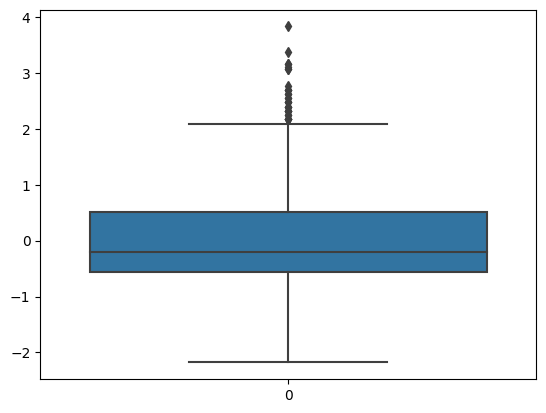

In [206]:
import seaborn as sns
sns.boxplot(data['Age'])

In [224]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.549253,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.659206,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.247139,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.432620,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0.432620,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.568135,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.247139,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.206033,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.050967,0,0,111369,30.0000,C


Importing Required Libraries For Logistic Regression

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Assigning Input And Output

In [226]:
X1 = data.drop('Survived', axis = 1)
y1 = data['Survived']
X1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,-0.549253,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.659206,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,-0.247139,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.432620,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,0.432620,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,-0.568135,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,-0.247139,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.206033,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,-0.050967,0,0,111369,30.0000,C


Replacing Strings

In [219]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1["Name"]= le.fit_transform(data['Name'])
X1["Sex"] = le.fit_transform(data['Sex'])
X1["Ticket"] = le.fit_transform(data['Ticket'])
X1["Embarked"] = le.fit_transform(data['Embarked'])



Splitting Of Data as Train and Test Data

In [220]:
X_train, X_test, y_train, y_test =train_test_split(X1, y1, test_size=0.2, random_state=42)

Logistic Regression

In [221]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0])

Confussion Matrix

In [222]:
cm=confusion_matrix(y_test,y_pred)

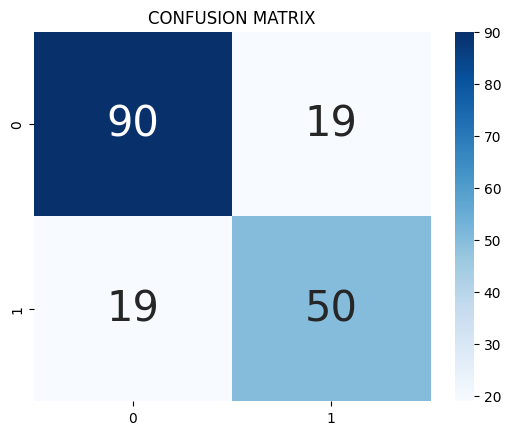

In [223]:
import seaborn as sns
ax=plt.axes()
df_cm=cm
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('CONFUSION MATRIX')
plt.show()